<a href="https://colab.research.google.com/github/varshini1020/Repo/blob/main/Set_Exercise_Q1072768.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/bill_authentication.csv')
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Axes: >

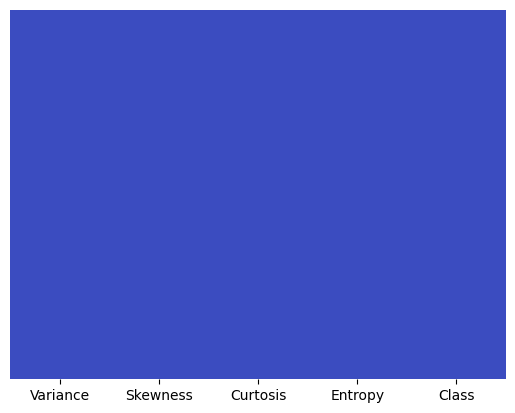

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [ ]:
print(df.duplicated().sum())
df1 = df.drop_duplicates()

24


In [ ]:
print(df1.isnull().sum())

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64


In [ ]:
df1.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712,0.452522
std,2.862906,5.868600,4.328365,2.085877,0.497925
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.786650,-1.627000,-1.545600,-2.393100,0.000000
50%,0.518735,2.334150,0.605495,-0.578890,0.000000
75%,2.853250,6.796025,3.199800,0.403863,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
# Step 1: Select numerical features
numerical_columns = df1.select_dtypes(include=['float64', 'int64'])

# Step 2: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

# Step 3: Define outliers using IQR method (values less than Q1 - 1.5*IQR or greater than Q3 + 1.5*IQR)
outliers_iqr = numerical_columns[((numerical_columns < (Q1 - 1.5 * IQR)) | (numerical_columns > (Q3 + 1.5 * IQR))).any(axis=1)]

# Step 4: Display rows that contain outliers
print("Outliers detected using IQR method:\n", outliers_iqr)
outliers_iqr.head(100)

Outliers detected using IQR method:
       Variance  Skewness  Curtosis  Entropy  Class
41    -0.20620    9.2207  -3.70440 -6.81030      0
45    -0.78690    9.5663  -3.78670 -7.50340      0
59    -0.78289   11.3603  -0.37644 -7.04950      0
194   -2.34100   12.3784   0.70403 -7.58360      0
202   -0.78689    9.5663  -3.78670 -7.50340      0
...        ...       ...       ...      ...    ...
1329  -2.96720  -13.2869  13.47270 -2.62710      1
1364  -2.83910   -6.6300  10.48490 -0.42113      1
1365  -4.50460   -5.8126  10.88670 -0.52846      1
1369  -3.75030  -13.4586  17.59320 -2.77710      1
1370  -3.56370   -8.3827  12.39300 -1.28230      1

[91 rows x 5 columns]


,Variance,Skewness,Curtosis,Entropy,Class
41,-0.20620,9.2207,-3.70440,-6.81030,0
45,-0.78690,9.5663,-3.78670,-7.50340,0
59,-0.78289,11.3603,-0.37644,-7.04950,0
194,-2.34100,12.3784,0.70403,-7.58360,0
202,-0.78689,9.5663,-3.78670,-7.50340,0
...,...,...,...,...,...
1329,-2.96720,-13.2869,13.47270,-2.62710,1
1364,-2.83910,-6.6300,10.48490,-0.42113,1
1365,-4.50460,-5.8126,10.88670,-0.52846,1
1369,-3.75030,-13.4586,17.59320,-2.77710,1


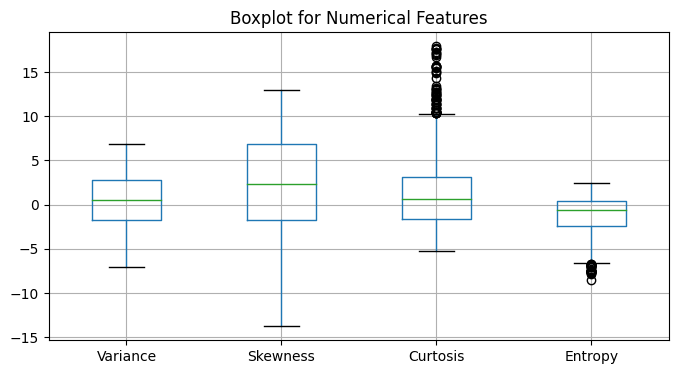

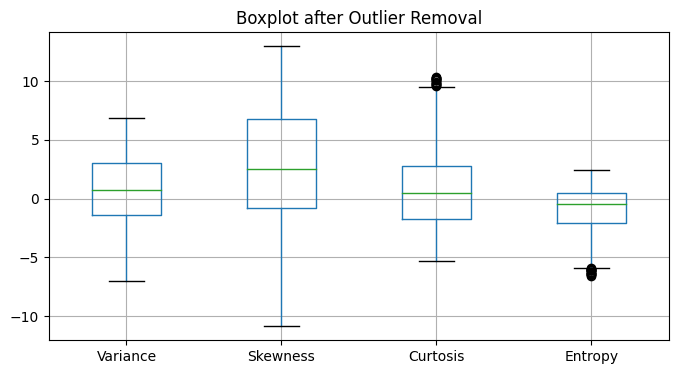

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Exclude the 'Class' column (if you don't want to process the target)
numerical_columns = df1.columns[:-1]

# Plot boxplots for each numerical column
plt.figure(figsize=(8, 4))
df[numerical_columns].boxplot()
plt.title('Boxplot for Numerical Features')
plt.show()


def remove_outliers(df1, columns):
    cleaned_df = df1.copy()
    for col in columns:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    return cleaned_df

# Cleaned data without outliers
cleaned_data = remove_outliers(df, numerical_columns)

# Optionally save the cleaned data to a new CSV
cleaned_data.to_csv('bill_authentication1.csv', index=False)

# Verify the result by plotting again
plt.figure(figsize=(8, 4))
cleaned_data[numerical_columns].boxplot()
plt.title('Boxplot after Outlier Removal')
plt.show()

Accuracy: 98.05%
Precision: 99.02%
Recall: 96.19%
F1-Score: 97.58%

Confusion Matrix:
[[150   1]
 [  4 101]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       151
           1       0.99      0.96      0.98       105

    accuracy                           0.98       256
   macro avg       0.98      0.98      0.98       256
weighted avg       0.98      0.98      0.98       256



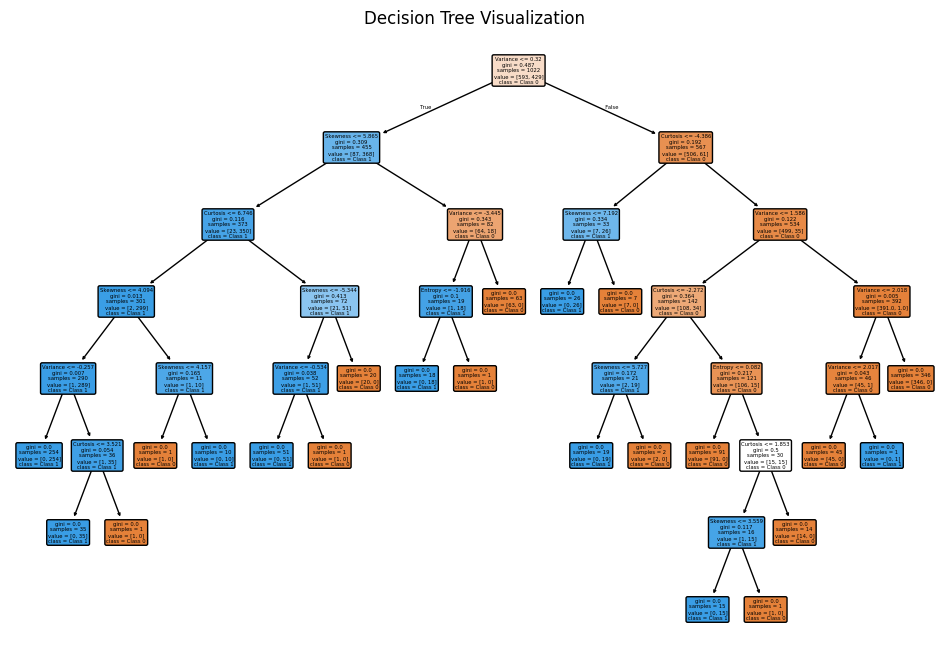

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt



# Split the dataset into features and target
X = cleaned_data[['Variance', 'Skewness', 'Curtosis', 'Entropy']]  # Features
y = cleaned_data['Class']  # Target (Class)

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=['Variance', 'Skewness', 'Curtosis', 'Entropy'],
          class_names=['Class 0', 'Class 1'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


C:\Users\Varshini R\OneDrive\p\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


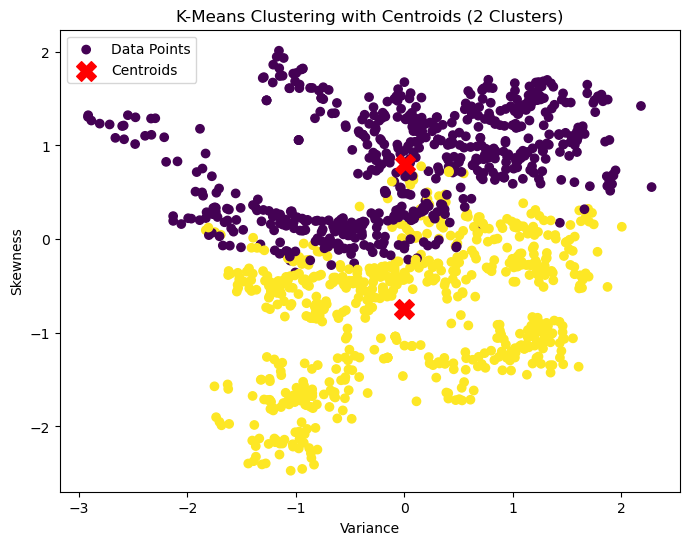

Inertia: 3091.3008250769212


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Selecting the features for clustering (ignore 'Class' since it's unsupervised)
X = cleaned_data[['Variance', 'Skewness', 'Curtosis', 'Entropy']]

# Feature scaling for better performance of K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels for each data point and the centroids of the clusters
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add the cluster labels to the original data for reference
cleaned_data['Cluster'] = clusters

# Plot the clusters based on two features (e.g., Variance and Skewness)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o', label='Data Points')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

# Add titles and labels
plt.title("K-Means Clustering with Centroids (2 Clusters)")
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.legend()
plt.show()

# Optional: Evaluate clustering using inertia (sum of squared distances of samples to their closest cluster center)
print(f"Inertia: {kmeans.inertia_}")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Split the dataset into features and target
X = cleaned_data[['Variance', 'Skewness', 'Curtosis', 'Entropy']]  # Features
y = cleaned_data['Class']  # Target (Class)

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 98.83%
Precision: 97.22%
Recall: 100.00%
F1-Score: 98.59%

Confusion Matrix:
[[148   3]
 [  0 105]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       151
           1       0.97      1.00      0.99       105

    accuracy                           0.99       256
   macro avg       0.99      0.99      0.99       256
weighted avg       0.99      0.99      0.99       256



Accuracy: 98.83%
Precision: 97.22%
Recall: 100.00%
F1-Score: 98.59%


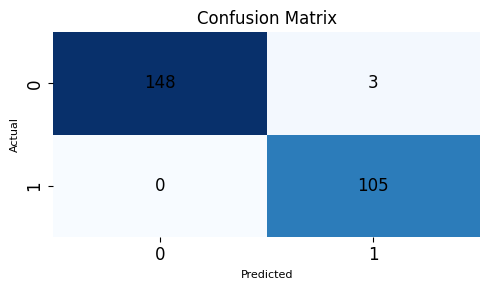

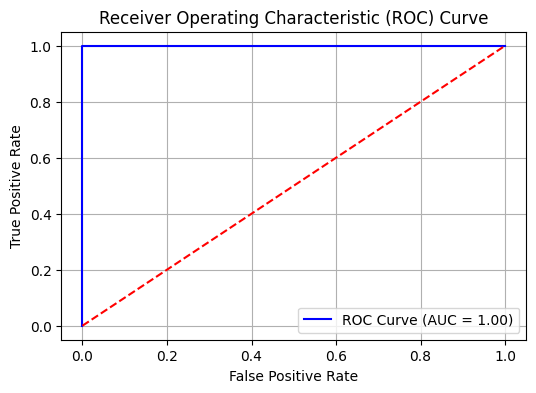

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



# Split the dataset into features and target (assuming 'Class' is the target variable)
X = cleaned_data[['Variance', 'Skewness', 'Curtosis', 'Entropy']]  # Features
y = cleaned_data['Class']  # Target (Class)

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")


# Plot the confusion matrix without automatic annotations
plt.figure(figsize=(5, 3))
ax = sns.heatmap(conf_matrix, annot=False, cmap='Blues', cbar=False, vmin=0, vmax=np.max(conf_matrix))

# Manually add text annotations
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j],
                 horizontalalignment='center',
                 verticalalignment='center',
                 color="black" if conf_matrix[i, j] == 0 else "black",
                 fontsize=12)

# Add labels and title
plt.title('Confusion Matrix', fontsize=12)
plt.xlabel('Predicted', fontsize=8)
plt.ylabel('Actual', fontsize=8)
plt.xticks(np.arange(2) + 0.5, ['0', '1'], fontsize=12)
plt.yticks(np.arange(2) + 0.5, ['0', '1'], fontsize=12)

plt.tight_layout()
plt.show()


# Plotting the ROC Curve
y_proba = model.predict_proba(X_test)[:, 1]  # Probability scores for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()



Mean Squared Error (MSE): 5.58
Root Mean Squared Error (RMSE): 2.36
Mean Absolute Error (MAE): 1.93
R-squared (R²): 0.25


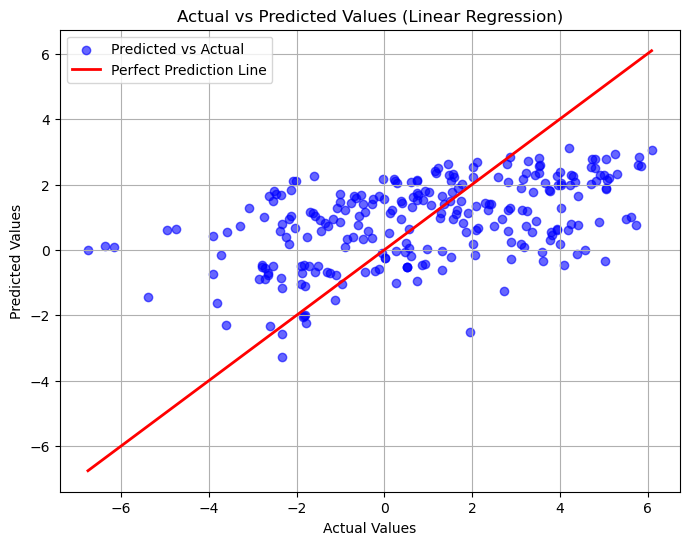

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt



# Split the dataset into features and target (assuming one of the columns is the continuous target for regression)
# Please replace 'Variance' with the correct target for regression purposes.
X = cleaned_data[['Skewness', 'Curtosis', 'Entropy']]  # Features (replace or adjust as needed)
y = cleaned_data['Variance']  # Target (this should be a continuous variable)

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using various regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction Line')

# Add titles and labels
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()